#### Problem Statement:-

 

To automate the loan eligibility process based on customer details provided while filling online application form. 
The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and 
co applicant, Required Loan Amount, Required Loan Term, Credit History and others.

In [71]:
# Libraries for data analysis & visualisation
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### 1. Data Collection and Processing

In [2]:
loan_dataset = pd.read_csv('dataset.csv')
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.size

7982

In [6]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
loan_dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### Treating missing values

In [10]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
loan_dataset['LoanAmount'].fillna((loan_dataset['LoanAmount'].mean()),inplace=True)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [16]:
loan_dataset['Loan_Amount_Term'].fillna((loan_dataset['Loan_Amount_Term'].mean()),inplace=True)

In [17]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [22]:
loan_dataset['Credit_History'].fillna((loan_dataset['Credit_History'].mean()),inplace=True)
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [25]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
loan_dataset.dropna(subset=['Married','Gender','Dependents','Self_Employed'],axis=0,inplace=True)

In [29]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
# Label Encoding

In [35]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [39]:
loan_dataset['Dependents'].value_counts()

0    319
1     95
2     94
4     46
Name: Dependents, dtype: int64

In [40]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [41]:
loan_dataset['Dependents'].value_counts()

0    319
1     95
2     94
4     46
Name: Dependents, dtype: int64

#### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

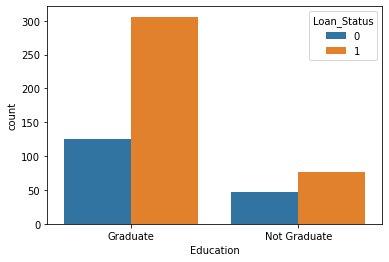

In [42]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

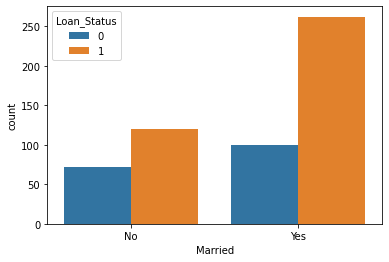

In [43]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [44]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [45]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [46]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [50]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [51]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 554, dtype: int64

## Train Test Split

In [52]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(554, 11) (443, 11) (111, 11)


# 3. Training the model:

### 1. Support Vector Machine Model

In [54]:
classifier = svm.SVC(kernel='linear')

In [55]:
#training the support Vector Macine model

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

#### Model Evaluation

In [56]:
# accuracy score on Training data

X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [90]:
print('Accuracy on training data : ', round(training_data_accuray*100,2),'%')

Accuracy on training data :  73.81 %


In [59]:
# accuracy score on Testing data

X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [91]:
print('Accuracy on test data : ', round(test_data_accuray*100,2),'%')

Accuracy on test data :  64.86 %


XXXXXXXXXX============================================================XXXXXXXXXXXXXXXX

### 2. KNN Model

In [72]:
knc = KNeighborsClassifier()

In [74]:
# Training the KNN model
knc_model = knc.fit(X_train,Y_train)

#### Model Evalution

In [92]:
# accuracy score on Training data
X_train_prediction = knc_model.predict(X_train)
training_data_accuray = round(accuracy_score(X_train_prediction,Y_train),4)

In [93]:
print('Accuracy on training data : ', round(training_data_accuray*100,2),'%')

Accuracy on training data :  73.81 %


In [84]:
# accuracy score on Testing data
X_test_prediction = knc_model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [85]:
print('Accuracy on test data : ', round(test_data_accuray*100,2),'%')

Accuracy on test data :  64.86 %


In [88]:
print('Classification report for X_test data:- \n\n',classification_report(Y_test,ts_pred_knc),'\n')

Classification report for X_test data:- 

               precision    recall  f1-score   support

           0       0.33      0.15      0.20        34
           1       0.70      0.87      0.77        77

    accuracy                           0.65       111
   macro avg       0.52      0.51      0.49       111
weighted avg       0.59      0.65      0.60       111
 



Confusin Matrix for X_test data:-



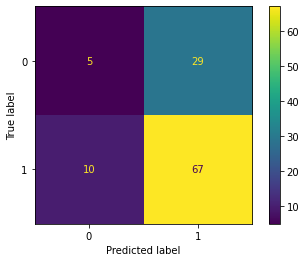

In [89]:
print('Confusin Matrix for X_test data:-\n\n',plot_confusion_matrix(knc_model,X_test,Y_test))

XXXXXXXXXX============================================================XXXXXXXXXXXXXXXX

### 3. Random Forest

Training Accuracy is:- 100.0 %
Testing Accuracy is:- 81.08 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.81      0.50      0.62        34
           1       0.81      0.95      0.87        77

    accuracy                           0.81       111
   macro avg       0.81      0.72      0.75       111
weighted avg       0.81      0.81      0.80       111
 

Confusin Matrix for xtest data:-



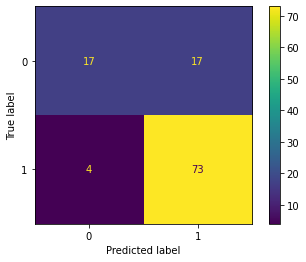

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc_model = rfc.fit(X_train,Y_train)
tr_pred_rfc = rfc_model.predict(X_train)
ts_pred_rfc = rfc_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_rfc = round(accuracy_score(Y_train,tr_pred_rfc),4)
ts_acc_rfc = round(accuracy_score(Y_test,ts_pred_rfc),4)
print("Training Accuracy is:-",round(tr_acc_rfc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_rfc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(Y_test,ts_pred_rfc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(rfc_model,X_test,Y_test))

Training Accuracy is:- 81.04 %
Testing Accuracy is:- 81.08 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.84      0.47      0.60        34
           1       0.80      0.96      0.88        77

    accuracy                           0.81       111
   macro avg       0.82      0.72      0.74       111
weighted avg       0.82      0.81      0.79       111
 

Confusin Matrix for xtest data:-



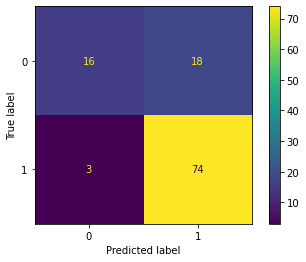

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)
lr_model = lr.fit(X_train,Y_train)
tr_pred_lr = lr_model.predict(X_train)
ts_pred_lr = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_lr = round(accuracy_score(Y_train,tr_pred_lr),4)
ts_acc_lr = round(accuracy_score(Y_test,ts_pred_lr),4)
print("Training Accuracy is:-",round(tr_acc_lr*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_lr*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(Y_test,ts_pred_lr),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(lr_model,X_test,Y_test))

Training Accuracy is:- 100.0 %
Testing Accuracy is:- 71.17 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       0.53      0.50      0.52        34
           1       0.78      0.81      0.79        77

    accuracy                           0.71       111
   macro avg       0.66      0.65      0.66       111
weighted avg       0.71      0.71      0.71       111
 

Confusin Matrix for xtest data:-



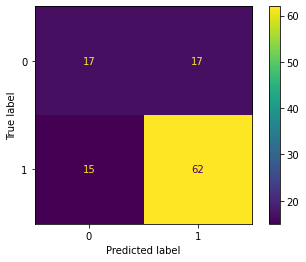

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=101)
dtc_model = dtc.fit(X_train,Y_train)
tr_pred_dtc = dtc_model.predict(X_train)
ts_pred_dtc = dtc_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_dtc = round(accuracy_score(Y_train,tr_pred_dtc),4)
ts_acc_dtc = round(accuracy_score(Y_test,ts_pred_dtc),4)
print("Training Accuracy is:-",round(tr_acc_dtc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_dtc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(Y_test,ts_pred_dtc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(dtc_model,X_test,Y_test))